# Llab 01

Рассчитайте среднее, медиану, дисперсию, стандартное отклонение, 1й и 3ю квартиль\
Для заданного значения N=30463 также рассчитайте 76.4% -ый доверительный интервал для суммы\
Построить гистограмму

In [1]:
import math
from pathlib import Path
from typing import List, Any

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from scipy.stats import norm
import pandas as pd

In [2]:
file_path = Path('.')
data_path = file_path / '..' / 'data' / 'lw1' / 'projects' / '1032173841' / 'data.csv'
data_path = data_path.resolve()

data = pd.read_csv(data_path, header=None)
lst = []
for idx, row in data.iterrows():
    lst.append(row.item())
n = len(lst)
    
print(lst[:5])
data.head()

[42, 22, 55, 102, 59]


,0
0,42
1,22
2,55
3,102
4,59


In [3]:
def mean(lst: List[float]) -> float:
    return sum(lst)/len(lst)

assert mean(lst) == np.mean(lst)
lst_mean = mean(lst)
print(f"mean = {lst_mean}")

mean = 54.4064602960969


In [4]:
def median(lst: List[float]) -> float:
    sort = sorted(lst)
    mid = (len(lst) - 1) // 2
    
    if (len(lst) % 2) == 0:
        return float(sort[mid])
    else:
        return float((sort[mid] + sort[mid + 1])/2)
    
assert median(lst) == np.median(lst)
lst_median = median(lst)
print(f"median = {lst_median}")

median = 49.0


In [5]:
def var(lst: List[float]) -> float:
    var = (
        sum([(l_i - mean(lst))**2 for l_i in lst]) / 
    #   ------------------------------------------
                         (len(lst)-1)
    )
    return var

print(var(lst), np.var(lst))
# assert var(lst) == np.var(lst)
lst_var = var(lst)
print(f"var = {lst_var}")

566.03402828919 565.272205909258
var = 566.03402828919


In [6]:
def std(lst: List[float]) -> float:
    return math.sqrt(var(lst))

print(std(lst), np.std(lst))
# assert std(lst) == np.std(lst)
lst_std = std(lst)
print(lst_std)

23.7914696538316 23.775453852855428
23.7914696538316


In [7]:
sort_lst = sorted(lst)
frst_kvar = sort_lst[int(len(lst)* 0.25)]

assert np.quantile(lst, 0.25) == frst_kvar
print(f"frst_kvar = {frst_kvar}")

frst_kvar = 39


In [8]:
sort_lst = sorted(lst)
third_kvar = sort_lst[int(len(lst)* 0.75)]

assert np.quantile(lst, 0.75) == third_kvar
print(f"third_kvar = {third_kvar}")

third_kvar = 63


In [9]:
N = 30463
alpha = 1 - (76.4/100)

Y_summ = N * mean(lst)
Y_summ

1657384.0

In [10]:
std_mean_error = (
    std(lst) * math.sqrt( 1 - (len(lst)/N) ) /
#   ----------------------------------------
            math.sqrt(len(lst))
)

t_l = norm.ppf(alpha / 2)
t_r = norm.ppf((1-alpha) / 2)

Y_mean_l = mean(lst) + t_l * std_mean_error
Y_mean_r = mean(lst) + t_r * std_mean_error

Y_summ_l = Y_mean_l * N
Y_summ_r = Y_mean_r * N

print(Y_summ_l, Y_summ_r)

1626261.6685381292 1649499.1224060408


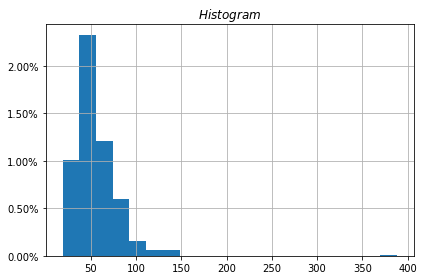

In [11]:
n_bins = 20
fig, axs = plt.subplots(1, 1, tight_layout=True)

n, bins, patches = axs.hist(lst, bins=n_bins, density=True)

axs.grid(True)
axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))

plt.title('$Histogram$')
plt.show()

In [12]:
data = {
    'mean':         [lst_mean],
    'median':       [lst_median],
    'var':          [lst_var],
    'std':          [lst_std],
    'frst_kvart':   [frst_kvar],
    'third_kvart':  [third_kvar],
    'Y_summ_left':  [Y_summ_l],
    'Y_summ_right': [Y_summ_r],
}

df = pd.DataFrame(data=data)
display(df)

csv_path = Path('.') / 'lab01.csv'
csv_path = csv_path.resolve()

if csv_path.exists():
    csv_path.unlink()

df.to_csv(csv_path, index=False)

,mean,median,var,std,frst_kvart,third_kvart,Y_summ_left,Y_summ_right
0,54.40646,49.0,566.034028,23.79147,39,63,1.626262e+06,1.649499e+06
